In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

sns.set()

### Visualise the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head() #Check the data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0.17% of the dataset is fraud which is 492 out of 284315


<Figure size 432x288 with 0 Axes>

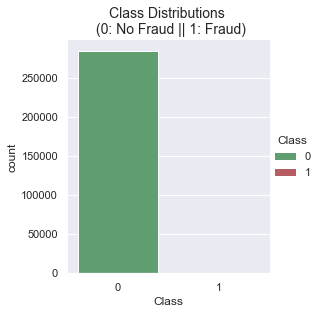

In [4]:
plt.figure(figsize=(6, 4))
sns.catplot(x='Class', kind='count', data=df, hue='Class', palette=["g", "r"], height =4)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14,)
print(f"{round(df['Class'].value_counts()[1] / len(df) * 100, 2)}% of the dataset is fraud which is {round(df['Class'].value_counts()[1], 2)} out of {round(df['Class'].value_counts()[0], 2)}")


#### We can see that the dataset is highly unbalanced with very few fraud cases (class ="1")

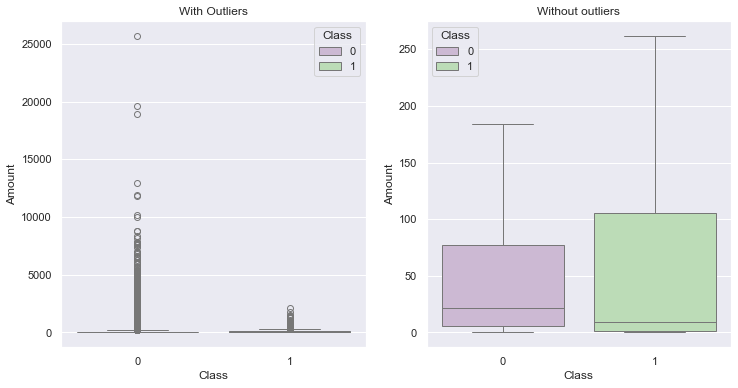

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
ax1.set_title('With Outliers')
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
ax2.set_title('Without outliers')
plt.show()

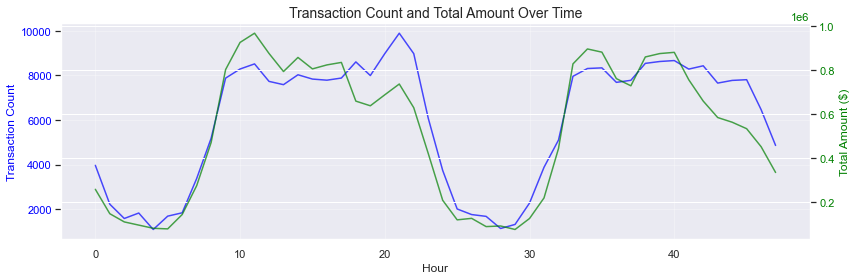

In [6]:
df['Hour'] = (df['Time'] // 3600).astype(int)  # Convert seconds to hours

# Aggregate by hour
hourly_data = df.groupby('Hour').agg({'Amount': 'sum', 'Time': 'count'}).rename(columns={'Time': 'Transaction_Count'})

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot the transaction count
ax1.set_title("Transaction Count and Total Amount Over Time", fontsize=14)
ax1.plot(hourly_data.index, hourly_data['Transaction_Count'], color='blue', label='Transaction Count', alpha=0.7)
ax1.set_xlabel("Hour")
ax1.set_ylabel("Transaction Count", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add a secondary axis for the total amount
ax2 = ax1.twinx()
ax2.plot(hourly_data.index, hourly_data['Amount'], color='green', label='Total Amount', alpha=0.7)
ax2.set_ylabel("Total Amount ($)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show grid and legend
ax1.grid(visible=True, alpha=0.3)
fig.tight_layout()

plt.show()

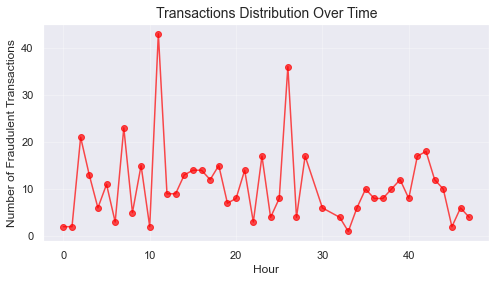

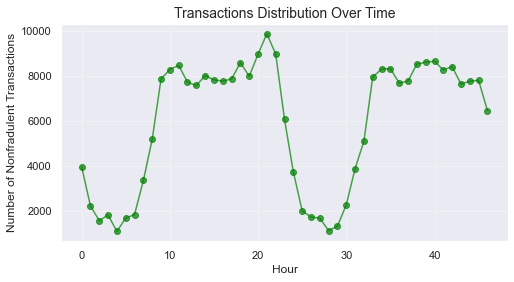

In [7]:
# For fraud data
fraud_data = df[df['Class'] == 1]

# Transactions by hour
fraud_hourly = fraud_data.groupby('Hour').size()
all_hours = pd.RangeIndex(start=fraud_hourly.index.min(), stop=fraud_hourly.index.max())


# Plot the fraud distribution over time
plt.figure(figsize=(8, 4))
plt.plot(fraud_hourly.index, fraud_hourly, marker='o', linestyle='-', color='red', alpha=0.7)
plt.title("Transactions Distribution Over Time", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Number of Fraudulent Transactions")
plt.grid(visible=True, alpha=0.3)
plt.show()

# For nonfraud data
nonfraud_data = df[df['Class'] == 0]
nonfraud_hourly = nonfraud_data.groupby('Hour').size()
nonfraud_hourly = nonfraud_hourly.reindex(all_hours, fill_value=0)

# Plot the fraud distribution over time
plt.figure(figsize=(8,4))
plt.plot(nonfraud_hourly.index, nonfraud_hourly, marker='o', linestyle='-', color='green', alpha=0.7)
plt.title("Transactions Distribution Over Time", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Number of Nonfradulent Transactions")
plt.grid(visible=True, alpha=0.3)
plt.show()

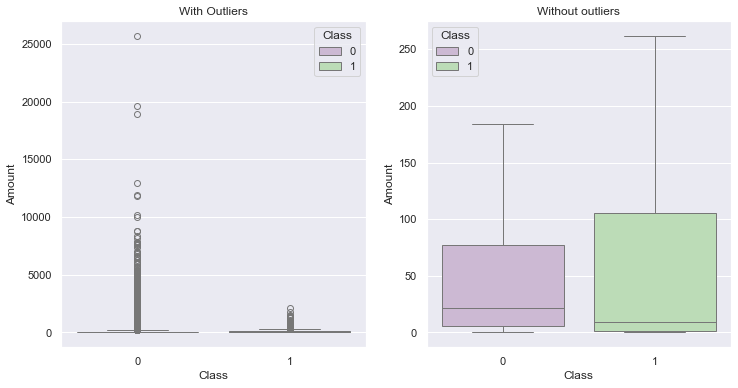

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
ax1.set_title('With Outliers')
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
ax2.set_title('Without outliers')
plt.show()

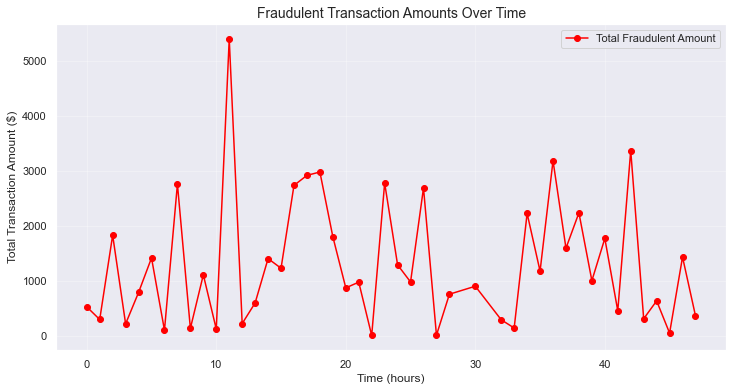

In [9]:
# Ensure 'Hour' is correctly set up for aggregation
fraud_amounts = fraud_data.groupby('Hour')['Amount'].sum()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(fraud_amounts.index, fraud_amounts.values, marker='o', color='red', label='Total Fraudulent Amount')
plt.title("Fraudulent Transaction Amounts Over Time", fontsize=14)
plt.xlabel("Time (hours)")
plt.ylabel("Total Transaction Amount ($)")
plt.grid(visible=True, alpha=0.3)
plt.legend()
plt.show()


### Correlations in the data

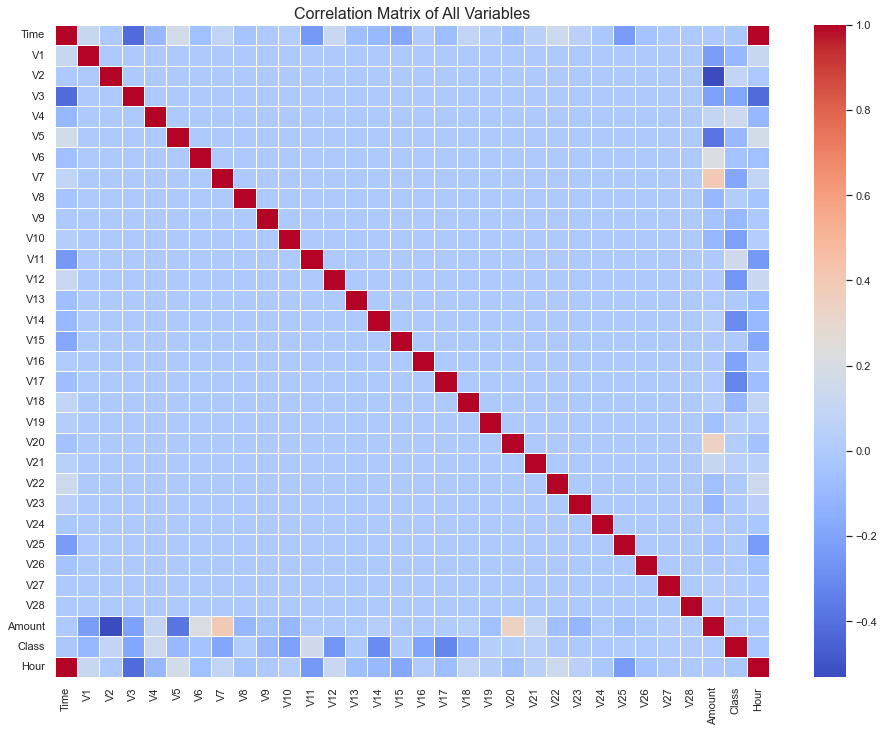

In [10]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Variables', fontsize=16)
plt.show()

#see that there is not much correlation as dataset is inbalance

In [11]:
#shuffle the entire dataset
df = df.sample(frac=1)

# there are 492 fraud cases, extract the same number of nonfraud case.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
186531,127149.0,-1.020707,0.869566,0.784372,-0.591949,0.577070,-0.700422,1.059337,-0.390285,-0.013008,...,0.526134,-0.502934,0.002568,1.140243,0.809983,-0.680609,-0.014545,12.36,0,35
83297,59777.0,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,319.20,1,16
119839,75602.0,1.337538,-0.179264,-1.053892,0.649703,1.927870,3.700170,-0.739087,0.816058,-1.991328,...,-0.882556,-0.024237,0.953120,0.611770,0.051834,0.008248,0.019964,19.46,0,21
182992,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1,34
6719,8415.0,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,...,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1.00,1,2


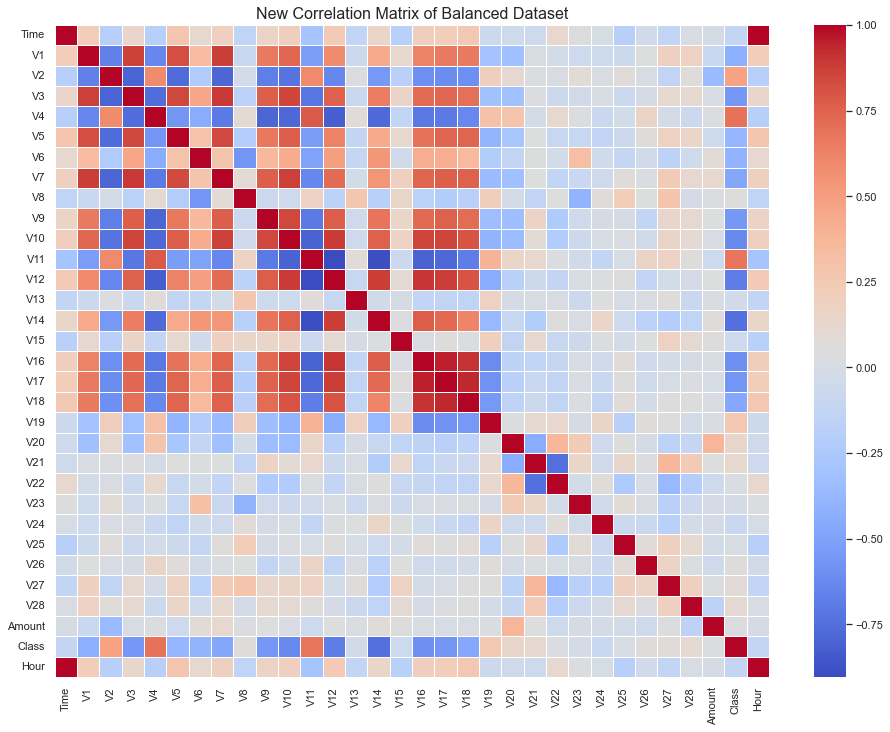

In [12]:
plt.figure(figsize=(16, 12))
new_correlation_matrix = new_df.corr()
sns.heatmap(new_correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('New Correlation Matrix of Balanced Dataset', fontsize=16)
plt.show()
#More correlations after balancing the data

In [13]:
#scale the data

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

#insert at the start of df
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
18497,1.089779,-0.647869,-9.151573,5.455072,-10.085887,2.031553,-5.183587,-1.763760,-3.630099,6.248238,...,-0.086822,-1.064605,-0.413784,-0.752004,0.255406,-0.309974,-0.038259,-0.312459,0,8
193901,22.748550,0.536367,-1.317894,-5.737663,-3.166621,2.541328,-1.030379,2.045651,1.687115,0.114330,...,1.340403,0.517894,-1.579150,-1.552820,-0.261258,-0.256836,-0.255007,0.197030,0,36
274853,1.698176,0.958094,1.963898,-1.459994,-3.282765,-2.439461,1.839407,2.905970,-0.503411,0.555786,...,-0.223839,-0.428087,0.072178,0.748685,-0.025100,0.756140,-0.085791,-0.056188,0,46
220917,-0.307413,0.677393,2.132471,0.157415,-2.493049,0.328990,0.878038,-1.304422,0.878626,-0.478040,...,0.283941,0.960182,-0.232440,-0.321288,0.684001,0.730081,-0.131570,-0.108989,0,39
154171,-0.084539,0.190416,1.920515,-0.472346,0.144954,0.344537,-0.672819,0.354471,-1.120872,0.189268,...,-0.055511,0.176928,0.355539,0.678658,-0.643197,0.390873,-0.043590,-0.045707,0,28


In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

#Split the data such that proportion of fraudulent and nonfraudulent are the same.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
#convert to numpy arrays required in the models
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#check proportion of fraudulent and nonfradulent are similar in test and train
train_counts_label = np.unique(original_ytrain, return_counts=True)
test_counts_label = np.unique(original_ytest, return_counts=True)
print(train_counts_label[1] / len(original_ytrain))
print(test_counts_label[1] / len(original_ytest))

Train: [ 56950  56951  56952 ... 284804 284805 284806] Test: [    0     1     2 ... 59990 60391 60713]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56950  56951  56952 ... 117008 119492 120241]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113918 113919 113920 ... 176033 177072 177429]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170877 170878 170879 ... 227843 228341 228435]
Train: [     0      1      2 ... 227843 228341 228435] Test: [227844 227845 227846 ... 284804 284805 284806]
[0.99827076 0.00172924]
[0.99827952 0.00172048]


#### Split the balanced data 

In [15]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [16]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [17]:
#Code copied from kaggle
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 355, in predict_proba
    neigh_ind 

Classifiers:  KNeighborsClassifier Has a training score of nan % accuracy score
Classifiers:  SVC Has a training score of 53.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [18]:
#Code copied from kaggle

# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -19.2143254902614, -18.4937733551053, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.6837146333443, -18.4311310279993, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.3460988468775, -15.239961

In [19]:
#Code copied from kaggle
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of nan % accuracy score
Classifiers:  SVC Has a training score of 53.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score
